In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from mlptools.io.read import read_from_n2p2_data

# path2target = path2target = "/home/y1u0d2/result/n2p2/Si/95/cut_3.77"
path2target = path2target = "/Users/y1u0d2/desktop/Lab/result/n2p2/Si/100/data"
mlpatoms = read_from_n2p2_data(path2target)

0 / 93300
1000 / 93300
2000 / 93300
3000 / 93300
4000 / 93300
5000 / 93300
6000 / 93300
7000 / 93300
8000 / 93300
9000 / 93300
10000 / 93300
11000 / 93300
12000 / 93300
13000 / 93300
14000 / 93300
15000 / 93300
16000 / 93300
17000 / 93300
18000 / 93300
19000 / 93300
20000 / 93300
21000 / 93300
22000 / 93300
23000 / 93300
24000 / 93300
25000 / 93300
26000 / 93300
27000 / 93300
28000 / 93300
29000 / 93300
30000 / 93300
31000 / 93300
32000 / 93300
33000 / 93300
34000 / 93300
35000 / 93300
36000 / 93300
37000 / 93300
38000 / 93300
39000 / 93300
40000 / 93300
41000 / 93300
42000 / 93300
43000 / 93300
44000 / 93300
45000 / 93300
46000 / 93300
47000 / 93300
48000 / 93300
49000 / 93300
50000 / 93300
51000 / 93300
52000 / 93300
53000 / 93300
54000 / 93300
55000 / 93300
56000 / 93300
57000 / 93300
58000 / 93300
59000 / 93300
60000 / 93300
61000 / 93300
62000 / 93300
63000 / 93300
64000 / 93300
65000 / 93300
66000 / 93300
67000 / 93300
68000 / 93300
69000 / 93300
70000 / 93300
71000 / 93300
72000

In [12]:
# plot energy
energy_df = pd.DataFrame([[atom.get_atomic_energy(), atom.get_atomic_volume(), atom.structure_id, atom.n_atoms] for atom in mlpatoms],
    columns=['energy', 'volume', 'structure_id', 'n_atoms'])

In [13]:
energy_df.value_counts("structure_id")

structure_id
mp-149          61407
amorphous       12308
mp-165           6426
mp-92            5222
mp-1079649       3712
mp-571520        3352
mp-slab           561
mp-four           149
mp-three          100
mp-149_dimer       63
Name: count, dtype: int64

In [15]:
energy_df.loc[energy_df['structure_id'] == 'amorphous']['n_atoms'].min(), energy_df.loc[energy_df['structure_id'] == 'amorphous']['n_atoms'].max()

(15, 109)

In [6]:
blacklist = ['mp-three', 'mp-four', 'mp-149_dimer', 'mp-slab', 'amorphous']
energy_df = energy_df[~energy_df['structure_id'].isin(blacklist)]

<Axes: xlabel='volume', ylabel='energy'>

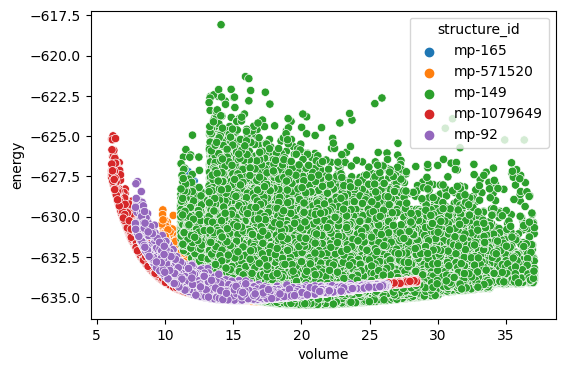

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=energy_df, x='volume', y='energy', hue='structure_id')

In [6]:
dimers = [atom for atom in mlpatoms if atom.n_atoms == 2]

In [ ]:
dimer_energy = [[dimer.get_atomic_distance(), dimer.get_atomic_energy()] for dimer in dimers]
dimer_energy_df = pd.DataFrame(dimer_energy, columns=['distance', 'energy'])
dimer_energy_df.sort_values(by='distance', inplace=True)
dimer_energy_df.reset_index(drop=True, inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(dimer_energy_df['distance'], dimer_energy_df['energy'], marker='o')
ax.set_xlabel('distance (ang)')
ax.set_ylabel('energy (eV)')
ax.set_title('Si dimer')

In [ ]:
# plot force
force_df = []
for atom in mlpatoms:
    tmp_df = pd.DataFrame(atom.force, columns=['fx', 'fy', 'fz'])
    tmp_df['structure_id'] = atom.structure_id
    force_df.append(tmp_df)

force_df = pd.concat(force_df, ignore_index=True)

In [ ]:
sns.scatterplot(data=force_df, x='fx', y='fy', hue='structure_id')

In [17]:
atom = mlpatoms[0]

In [20]:
# get elements from list randomly
from random import sample
sample(mlpatoms, 10)

In [45]:
import random

rdf_x = atom.get_rdf(rcut=6.0, bins=200)[:, 0]
rdf_val_list = []
for atom in mlpatoms:
    rdf_val = atom.get_rdf(rcut=6.0, bins=200)[:, 1]
    rdf_val_list.append(rdf_val)
rdf_val_list = np.array(rdf_val_list)

(0.0, 1.5)

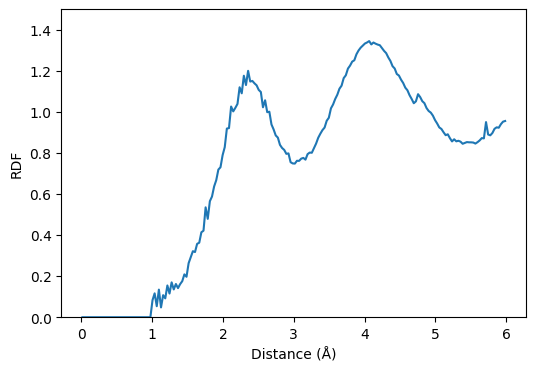

In [48]:
mean_rdf = np.mean(rdf_val_list, axis=0)
std_rdf = np.std(rdf_val_list, axis=0)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(rdf_x, mean_rdf)
# ax.fill_between(rdf_x, mean_rdf - std_rdf, mean_rdf + std_rdf, alpha=0.3)
ax.set_xlabel('Distance (Å)')
ax.set_ylabel('RDF')
ax.set_ylim(0, 1.5)